### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


**Valor por tienda**

In [14]:
tienda_1 = pd.read_csv(url, parse_dates=['Fecha de Compra'], dayfirst=True)
tienda_2 = pd.read_csv(url2, parse_dates=['Fecha de Compra'], dayfirst=True)
tienda_3 = pd.read_csv(url3, parse_dates=['Fecha de Compra'], dayfirst=True)
tienda_4 = pd.read_csv(url4, parse_dates=['Fecha de Compra'],dayfirst=True)

inicio = pd.to_datetime('01/01/2020', dayfirst=True)
fin = pd.to_datetime('30/03/2023', dayfirst=True)

tienda_1_data = tienda_1[(tienda_1['Fecha de Compra'] >= inicio) & (tienda_1['Fecha de Compra'] <= fin)]
tienda_2_data = tienda_2[(tienda_2['Fecha de Compra'] >= inicio) & (tienda_2['Fecha de Compra'] <= fin)]
tienda_3_data = tienda_3[(tienda_3['Fecha de Compra'] >= inicio) & (tienda_3['Fecha de Compra'] <= fin)]
tienda_4_data = tienda_4[(tienda_4['Fecha de Compra'] >= inicio) & (tienda_4['Fecha de Compra'] <= fin)]


ingreso_tienda_1 = tienda_1_data['Precio'].sum()
ingreso_tienda_2 = tienda_2_data['Precio'].sum()
ingreso_tienda_3 = tienda_3_data['Precio'].sum()
ingreso_tienda_4 = tienda_4_data['Precio'].sum()


print(f'Ingreso total tienda #1 (2020-2023): {int(ingreso_tienda_1):,}')
print(f'Ingreso total tienda #2 (2020-2023): {int(ingreso_tienda_2):,}')
print(f'Ingreso total tienda #3 (2020-2023): {int(ingreso_tienda_3):,}')
print(f'Ingreso total tienda #4 (2020-2023): {int(ingreso_tienda_4):,}')


Ingreso total tienda #1 (2020-2023): 1,149,968,700
Ingreso total tienda #2 (2020-2023): 1,116,249,500
Ingreso total tienda #3 (2020-2023): 1,097,727,100
Ingreso total tienda #4 (2020-2023): 1,038,375,700



***Grafica***

#1. Análisis de facturación



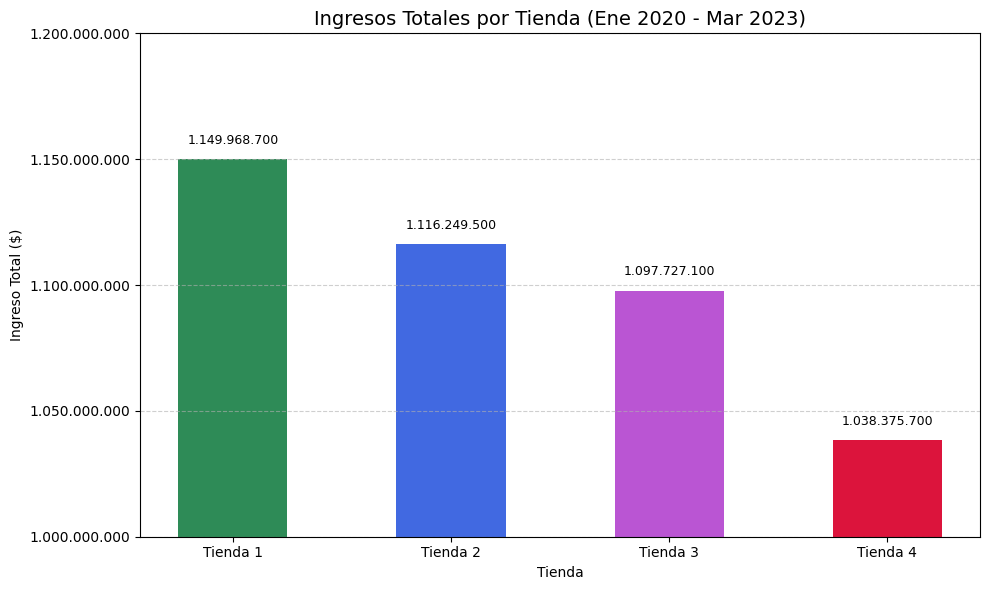

In [43]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Datos
ingresos = [ingreso_tienda_1, ingreso_tienda_2, ingreso_tienda_3, ingreso_tienda_4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['seagreen', 'royalblue', 'mediumorchid', 'crimson']

# Escala de eje Y
paso = 50_000_000
inicio = 1_000_000_000
ingreso_max = max(ingresos)
fin = int(np.ceil((ingreso_max + paso) / paso) * paso)  # redondear al siguiente múltiplo

# Crear gráfico
plt.figure(figsize=(10, 6))
barras = plt.bar(tiendas, ingresos, color=colores, width=0.5)

# Título y etiquetas
plt.title('Ingresos Totales por Tienda (Ene 2020 - Mar 2023)', fontsize=14)
plt.xlabel('Tienda')
plt.ylabel('Ingreso Total ($)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Establecer límites y ticks fijos
plt.ylim(inicio, fin)
plt.yticks(np.arange(inicio, fin + paso, paso))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Etiquetas sobre las barras
for barra, ingreso in zip(barras, ingresos):
    texto = f"{ingreso:,.0f}".replace(",", "X").replace(".", ",").replace("X", ".")
    plt.text(barra.get_x() + barra.get_width() / 2,
             ingreso + paso * 0.1,
             texto,
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


La gráfica muestra los ingresos acumulados de cuatro tiendas en el periodo comprendido entre enero de 2020 y marzo de 2023. Se observa que, aunque todas las tiendas superan la barrera de los mil millones de pesos, hay diferencias notables entre ellas.

En particular, la "Tienda 4" presenta un ingreso significativamente menor en comparación con las demás. Esto indica que esa tienda ha tenido un rendimiento inferior, lo que podría deberse a factores como menor volumen de ventas, ubicación con menor tráfico de clientes, problemas operativos o estrategias de ventas menos efectivas.

# 2. Ventas por categoría

Productos vendidos dependiendo de la categoria

In [49]:
produc_vend__tienda_1 = tienda_1['Categoría del Producto'].value_counts()
produc_vend__tienda_2 = tienda_2['Categoría del Producto'].value_counts()
produc_vend__tienda_3 = tienda_3['Categoría del Producto'].value_counts()
produc_vend__tienda_4 = tienda_4['Categoría del Producto'].value_counts()

print("Ventas categoría tienda #1:")
print(produc_vend__tienda_1)
print("\nVentas categoría tienda #2:")
print(produc_vend__tienda_2)
print("\nVentas categoría tienda #3:")
print(produc_vend__tienda_3)
print("\nVentas categoría tienda #4:")
print(produc_vend__tienda_4)

Ventas categoría tienda #1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Ventas categoría tienda #2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Ventas categoría tienda #3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64

Ventas categoría tiend

Datos organizados

In [50]:
import pandas as pd

# Lista de categorías en el orden deseado
categorias = [
    'Muebles', 'Electrónicos', 'Juguetes', 'Electrodomésticos',
    'Deportes y diversión', 'Instrumentos musicales',
    'Libros', 'Artículos para el hogar'
]

# Diccionarios con los datos por tienda
datos_tiendas = {
    "tienda1": {
        'Muebles': 465, 'Electrónicos': 448, 'Juguetes': 324,
        'Electrodomésticos': 312, 'Deportes y diversión': 284,
        'Instrumentos musicales': 182, 'Libros': 173, 'Artículos para el hogar': 171
    },
    "tienda2": {
        'Muebles': 442, 'Electrónicos': 422, 'Juguetes': 313,
        'Electrodomésticos': 305, 'Deportes y diversión': 275,
        'Instrumentos musicales': 224, 'Libros': 197, 'Artículos para el hogar': 181
    },
    "tienda3": {
        'Muebles': 499, 'Electrónicos': 451, 'Juguetes': 315,
        'Electrodomésticos': 278, 'Deportes y diversión': 277,
        'Libros': 185, 'Instrumentos musicales': 177, 'Artículos para el hogar': 177
    },
    "tienda4": {
        'Muebles': 480, 'Electrónicos': 451, 'Juguetes': 338,
        'Deportes y diversión': 277, 'Electrodomésticos': 254,
        'Artículos para el hogar': 201, 'Libros': 187, 'Instrumentos musicales': 170
    }
}

# Función para convertir diccionario en lista ordenada según categorías
def ordenar_por_categoria(data_dict, categorias):
    return pd.Series(data_dict).reindex(categorias).tolist()

# Crear listas ordenadas
tiendas_ordenadas = {
    nombre: ordenar_por_categoria(data, categorias)
    for nombre, data in datos_tiendas.items()
}

# Impresión formateada
print("categorias =", categorias)
for tienda, valores in tiendas_ordenadas.items():
    print(f"{tienda} =", valores)


categorias = ['Muebles', 'Electrónicos', 'Juguetes', 'Electrodomésticos', 'Deportes y diversión', 'Instrumentos musicales', 'Libros', 'Artículos para el hogar']
tienda1 = [465, 448, 324, 312, 284, 182, 173, 171]
tienda2 = [442, 422, 313, 305, 275, 224, 197, 181]
tienda3 = [499, 451, 315, 278, 277, 177, 185, 177]
tienda4 = [480, 451, 338, 254, 277, 170, 187, 201]


Grafico por ventas de categorias



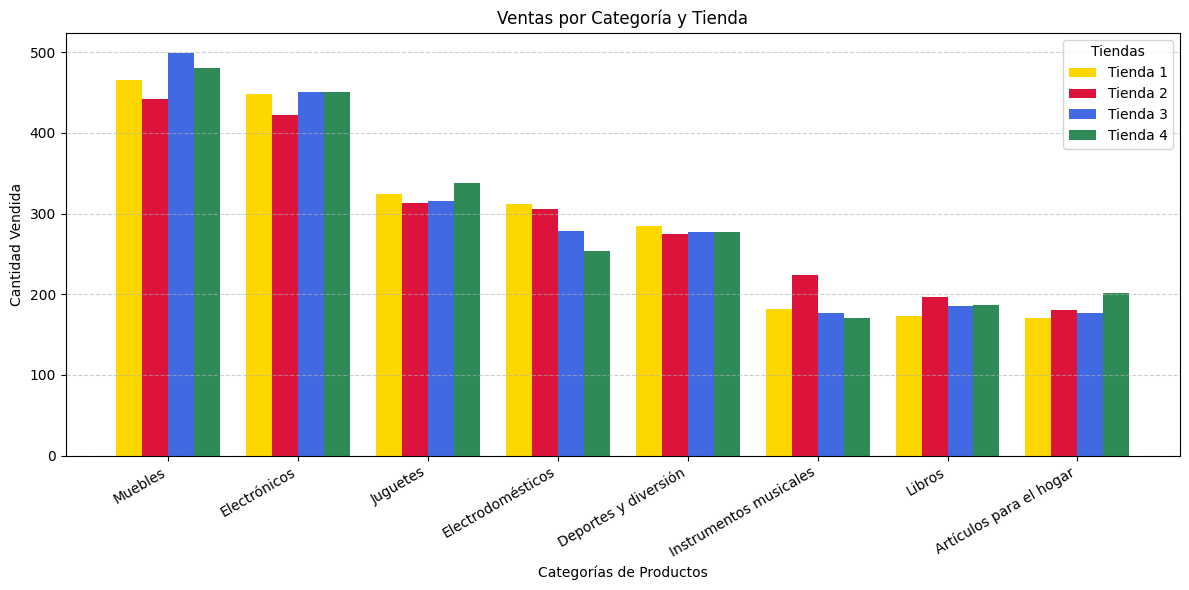

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Reutilizamos las variables: categorias y tiendas_ordenadas del código anterior
categorias = [
    'Muebles', 'Electrónicos', 'Juguetes', 'Electrodomésticos',
    'Deportes y diversión', 'Instrumentos musicales',
    'Libros', 'Artículos para el hogar'
]

# Ventas ordenadas por tienda (desde el código anterior)
tienda1 = tiendas_ordenadas['tienda1']
tienda2 = tiendas_ordenadas['tienda2']
tienda3 = tiendas_ordenadas['tienda3']
tienda4 = tiendas_ordenadas['tienda4']

# Posiciones para cada categoría en el eje X
x = np.arange(len(categorias))
ancho_barra = 0.2  # Separación entre las barras de cada tienda

# Crear gráfico
plt.figure(figsize=(12, 6))
plt.bar(x - 1.5 * ancho_barra, tienda1, width=ancho_barra, label='Tienda 1', color='gold')
plt.bar(x - 0.5 * ancho_barra, tienda2, width=ancho_barra, label='Tienda 2', color='crimson')
plt.bar(x + 0.5 * ancho_barra, tienda3, width=ancho_barra, label='Tienda 3', color='royalblue')
plt.bar(x + 1.5 * ancho_barra, tienda4, width=ancho_barra, label='Tienda 4', color='seagreen')

# Etiquetas y detalles
plt.xlabel('Categorías de Productos')
plt.ylabel('Cantidad Vendida')
plt.title('Ventas por Categoría y Tienda')
plt.xticks(x, categorias, rotation=30, ha='right')
plt.legend(title='Tiendas')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


Dominio en Muebles y Electrónicos:
Las cuatro tiendas presentan sus mayores volúmenes de ventas en las categorías de Muebles y Electrónicos, siendo la Tienda 3 la más destacada en ambas. Esto sugiere que estos productos son los más demandados en general, y que la Tienda 3 tiene una fuerte presencia en estos sectores.

Desempeño uniforme en Juguetes y Deportes:
Las ventas de Juguetes y Deportes y diversión se mantienen en niveles similares entre las tiendas, sin grandes diferencias. Esto indica un comportamiento de mercado estable y competitivo en estas categorías.

La tienda 4 presenta un bajo desempeño en comparacion con las otras tiendas

# 3. Calificación promedio de la tienda


En esta sección, se muestran las valoraciones promedio de los clientes por tienda, con el fin de evaluar su nivel de satisfacción

In [56]:
# Calificaciones promedio por tienda
promedio_tienda_1 = tienda_1['Calificación'].mean()
promedio_tienda_2 = tienda_2['Calificación'].mean()
promedio_tienda_3 = tienda_3['Calificación'].mean()
promedio_tienda_4 = tienda_4['Calificación'].mean()

# Imprimir resultados con dos decimales
print(f"Calificación promedio Tienda 1: {promedio_tienda_1:.2f}")
print(f"Calificación promedio Tienda 2: {promedio_tienda_2:.2f}")
print(f"Calificación promedio Tienda 3: {promedio_tienda_3:.2f}")
print(f"Calificación promedio Tienda 4: {promedio_tienda_4:.2f}")


Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.00


Grafico de visualizacion

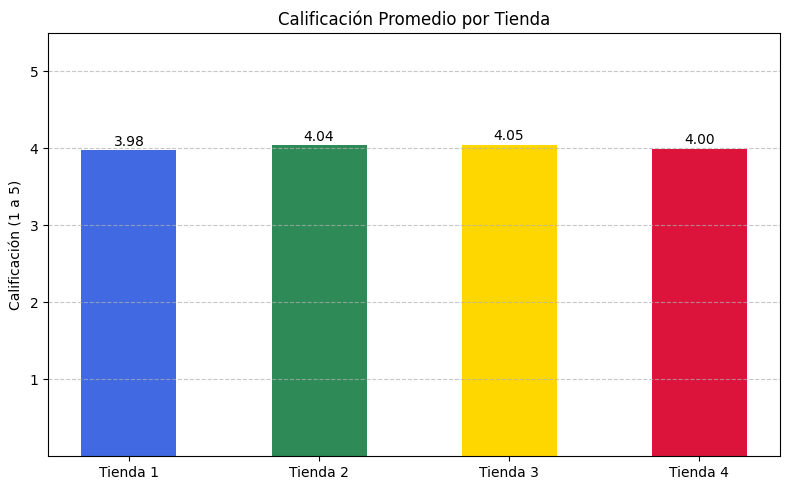

In [60]:
import matplotlib.pyplot as plt

# Calificaciones promedio calculadas anteriormente
calificaciones = [promedio_tienda_1, promedio_tienda_2, promedio_tienda_3, promedio_tienda_4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['royalblue', 'seagreen', 'gold', 'crimson']

# Crear gráfico
plt.figure(figsize=(8, 5))
barras = plt.bar(tiendas, calificaciones, color=colores, width=0.5)

# Añadir etiquetas numéricas sobre cada barra
for barra, calificacion in zip(barras, calificaciones):
    plt.text(barra.get_x() + barra.get_width()/2, calificacion + 0.02,
             f'{calificacion:.2f}', ha='center', va='bottom', fontsize=10)

# Configuración del gráfico
plt.ylim(0, 5.5)
plt.yticks([1, 2, 3, 4, 5])
plt.title('Calificación Promedio por Tienda')
plt.ylabel('Calificación (1 a 5)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



Tienda 3 destaca con la mayor calificación promedio, lo que sugiere una experiencia de compra positiva, posiblemente por buen servicio, calidad de productos o cumplimiento de expectativas.

Tienda 1 presenta la calificación más baja, lo que indica una posible insatisfacción de los clientes en aspectos como atención, entregas o calidad percibida.

Las Tiendas 2 y 4 se encuentran en un nivel intermedio, lo que indica un desempeño aceptable pero con oportunidades de mejora.



# 4. Productos más y menos vendidos

In [65]:
# Top y bottom productos por tienda (puedes ajustar el número de productos si deseas más de uno)
def mostrar_top_bottom(df, nombre_tienda):
    conteo = df['Producto'].value_counts()
    producto_mas_vendido = conteo.idxmax()
    ventas_mas_vendido = conteo.max()

    producto_menos_vendido = conteo.idxmin()
    ventas_menos_vendido = conteo.min()

    print(f"# {nombre_tienda}")
    print(f" Producto más vendido: {producto_mas_vendido} ({ventas_mas_vendido} ventas)")
    print(f" Producto menos vendido: {producto_menos_vendido} ({ventas_menos_vendido} ventas)")
    print("")

# Aplicar a cada tienda
mostrar_top_bottom(tienda_1, "Tienda 1")
mostrar_top_bottom(tienda_2, "Tienda 2")
mostrar_top_bottom(tienda_3, "Tienda 3")
mostrar_top_bottom(tienda_4, "Tienda 4")


# Tienda 1
 Producto más vendido: Microondas (60 ventas)
 Producto menos vendido: Auriculares con micrófono (33 ventas)

# Tienda 2
 Producto más vendido: Iniciando en programación (65 ventas)
 Producto menos vendido: Juego de mesa (32 ventas)

# Tienda 3
 Producto más vendido: Kit de bancas (57 ventas)
 Producto menos vendido: Bloques de construcción (35 ventas)

# Tienda 4
 Producto más vendido: Cama box (62 ventas)
 Producto menos vendido: Guitarra eléctrica (33 ventas)



Grafica que muestra los productos mas vendios y menos vendidos por tienda

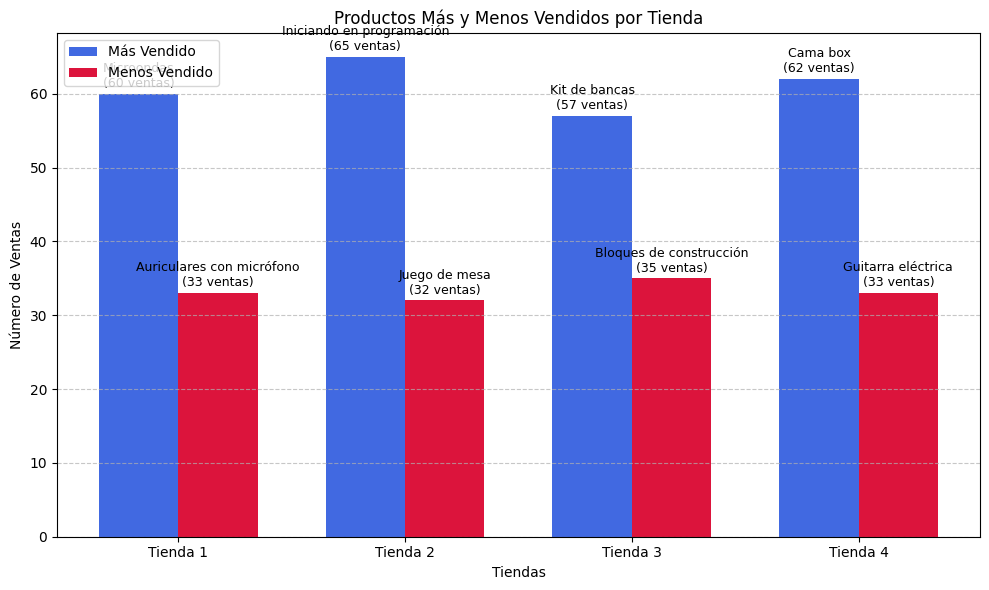

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Función para obtener el producto más y menos vendido por tienda
def obtener_top_bottom(df):
    conteo = df['Producto'].value_counts()
    producto_mas_vendido = conteo.idxmax()
    ventas_mas_vendido = conteo.max()

    producto_menos_vendido = conteo.idxmin()
    ventas_menos_vendido = conteo.min()

    return producto_mas_vendido, ventas_mas_vendido, producto_menos_vendido, ventas_menos_vendido

# Obtenemos los datos de los productos más y menos vendidos por tienda
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
productos_mas_vendidos = []
productos_menos_vendidos = []
ventas_mas_vendidos = []
ventas_menos_vendidos = []

for tienda, data in zip([tienda_1, tienda_2, tienda_3, tienda_4], tiendas):
    mas_vendido, ventas_mas, menos_vendido, ventas_menos = obtener_top_bottom(tienda)
    productos_mas_vendidos.append(mas_vendido)
    productos_menos_vendidos.append(menos_vendido)
    ventas_mas_vendidos.append(ventas_mas)
    ventas_menos_vendidos.append(ventas_menos)

# Posiciones para las barras
x = np.arange(len(tiendas))
ancho_barra = 0.35  # Ancho de las barras

# Crear gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Barras para productos más vendidos y menos vendidos
barras_mas_vendidos = ax.bar(x - ancho_barra / 2, ventas_mas_vendidos, ancho_barra, label='Más Vendido', color='royalblue')
barras_menos_vendidos = ax.bar(x + ancho_barra / 2, ventas_menos_vendidos, ancho_barra, label='Menos Vendido', color='crimson')

# Añadir etiquetas en las barras
for barra, producto, ventas in zip(barras_mas_vendidos, productos_mas_vendidos, ventas_mas_vendidos):
    ax.text(barra.get_x() + barra.get_width()/2, barra.get_height() + 0.5,
            f'{producto}\n({ventas} ventas)', ha='center', va='bottom', fontsize=9)

for barra, producto, ventas in zip(barras_menos_vendidos, productos_menos_vendidos, ventas_menos_vendidos):
    ax.text(barra.get_x() + barra.get_width()/2, barra.get_height() + 0.5,
            f'{producto}\n({ventas} ventas)', ha='center', va='bottom', fontsize=9)

# Configuración del gráfico
ax.set_xlabel('Tiendas')
ax.set_ylabel('Número de Ventas')
ax.set_title('Productos Más y Menos Vendidos por Tienda')
ax.set_xticks(x)
ax.set_xticklabels(tiendas)
ax.legend()

# Añadir una cuadrícula en el eje y
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


El gráfico muestra claramente las diferencias en las ventas de productos entre las tiendas. Los productos más vendidos son una señal de lo que los clientes prefieren y pueden indicar qué categorías o artículos deben recibir más atención en términos de stock y promoción. Por otro lado, los productos menos vendidos reflejan posibles oportunidades de mejora, como ajustes en el surtido, precios o estrategias de marketing.

Observaciones clave:
En Tienda 1, el producto más vendido muestra una tendencia positiva, mientras que el menos vendido podría indicar que ciertos artículos no están alineados con las preferencias de los clientes.

En Tienda 2, aunque el producto más vendido tiene un buen desempeño, el producto menos vendido podría necesitar una evaluación más profunda para entender si es cuestión de baja demanda o falta de visibilidad.

# 5. Envío promedio por tienda

Envios promedio por tienda


In [78]:
import pandas as pd

# Calcular el envío promedio por tienda
envio_promedio_1 = tienda_1['Costo de envío'].mean()
envio_promedio_2 = tienda_2['Costo de envío'].mean()
envio_promedio_3 = tienda_3['Costo de envío'].mean()
envio_promedio_4 = tienda_4['Costo de envío'].mean()

# Mostrar los resultados
print(f" Envío promedio Tienda #1: ${envio_promedio_1:.2f}")
print(f" Envío promedio Tienda #2: ${envio_promedio_2:.2f}")
print(f" Envío promedio Tienda #3: ${envio_promedio_3:.2f}")
print(f" Envío promedio Tienda #4: ${envio_promedio_4:.2f}")


 Envío promedio Tienda #1: $26018.61
 Envío promedio Tienda #2: $25216.24
 Envío promedio Tienda #3: $24805.68
 Envío promedio Tienda #4: $23459.46


Grafico

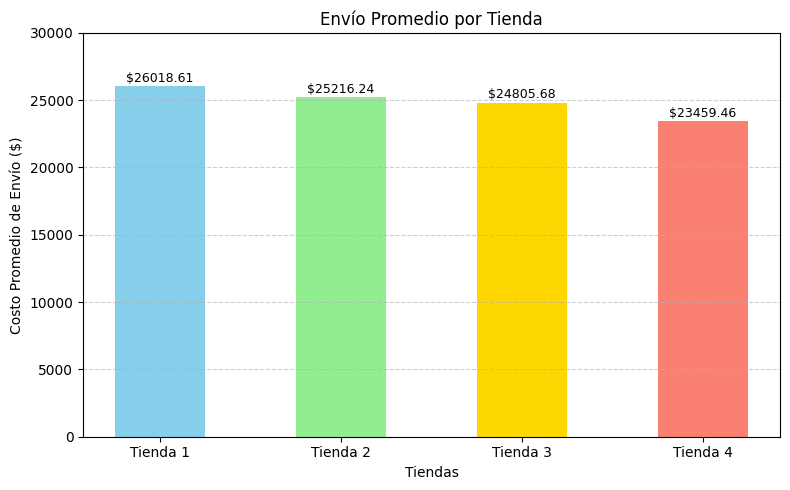

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo (usa los reales que ya calculaste)
envios_promedio = [envio_promedio_1, envio_promedio_2, envio_promedio_3, envio_promedio_4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['skyblue', 'lightgreen', 'gold', 'salmon']

# Crear gráfico
plt.figure(figsize=(8, 5))
barras = plt.bar(tiendas, envios_promedio, color=colores, width=0.5)

# Etiquetas sobre las barras
for i, envio in enumerate(envios_promedio):
    plt.text(i, envio + 100, f"${envio:.2f}", ha='center', va='bottom', fontsize=9)

# Configuración del eje Y
plt.yticks(np.arange(0, max(envios_promedio) + 5000, 5000))

# Etiquetas y estilo
plt.title('Envío Promedio por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Costo Promedio de Envío ($)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


El gráfico de envío promedio revela diferencias notables entre las tiendas en cuanto al costo logístico por pedido. Algunas tiendas presentan costos de envío más elevados, lo que puede impactar negativamente en la decisión de compra de los clientes, especialmente si no está justificado por un mejor servicio o mayor velocidad de entrega.


*   La Tienda4 con el costo de envío más bajo representa una ventaja competitiva, ya que puede atraer a más compradores sensibles al precio total.
*   La tienda con el costo más alto debería evaluar sus políticas logísticas, ya que puede estar perdiendo ventas frente a competidores con opciones más accesibles.







**Conclusiones**

Ingresos Totales (2020–2023):
La "tienda 4" con los ingresos más bajos  tiene menor participación en el mercado y en generación de utilidades.

La tienda 4 presento ingresos de 1,038,375,700 en comparacion con la primer tienda que es de 1,149,968,700

Tienda 4 se encuentra en desventaja competitiva en varios frentes clave. Salir del mercado o venderla permitiría redirigir recursos hacia las tiendas con mejor desempeño o reinvertir en estrategias de crecimiento más rentables.
